In [1]:
from census import Census
from us import states
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import my_api_key
import json
from shapely.geometry import Point
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
# Read two datasets into dataframes and concatenate into one dataset: crime_df

crime_17_df = pd.read_csv("data/chicago_crime_2017.csv")
crime_18_df = pd.read_csv("data/chicago_crime_2018.csv")
crime_df = pd.concat([crime_17_df, crime_18_df])
# Drop all rows with NAs in Latitude and Longitude
crime_df = crime_df.dropna(subset=["Latitude", "Longitude"])

In [26]:
crime_df["Block"]

0                      072XX N CALIFORNIA AVE
1                           055XX W GRAND AVE
2                          043XX S TALMAN AVE
3                         055XX W BELMONT AVE
4                         022XX W CHICAGO AVE
5                             001XX E 59TH ST
6                            003XX W 103RD ST
7                             032XX W 26TH ST
8                     026XX S CALIFORNIA BLVD
9                     007XX N SACRAMENTO BLVD
10                        007XX N OAKLEY BLVD
12                         033XX S KEDZIE AVE
25                           076XX S LOWE AVE
26                            028XX W 21ST PL
27                        099XX S WESTERN AVE
28                        112XX S INDIANA AVE
36                        001XX S CENTRAL AVE
37                            016XX W 79TH ST
38                        038XX W GRENSHAW ST
39                        019XX W CORTLAND ST
40                      009XX N MASSASOIT AVE
41                         013XX S

In [4]:
crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
type_count_df = crime_df.groupby(["Primary Type", "Year"]).size().to_frame("Count")
type_count_df["Total"] = type_count_df.groupby(level=0)["Count"].transform("sum")
type_count_df = type_count_df.sort_values(['Total', "Year"], ascending=False)
type_count_df.head(20)

Count   Total
Primary Type        Year               
THEFT               2018  64024  127610
                    2017  63586  127610
BATTERY             2018  49720   98857
                    2017  49137   98857
CRIMINAL DAMAGE     2018  27700   56655
                    2017  28955   56655
ASSAULT             2018  20342   39594
                    2017  19252   39594
DECEPTIVE PRACTICE  2018  17863   35631
                    2017  17768   35631
OTHER OFFENSE       2018  16970   33935
                    2017  16965   33935
BURGLARY            2018  11687   24634
                    2017  12947   24634
NARCOTICS           2018  12798   24273
                    2017  11475   24273
ROBBERY             2018   9680   21549
                    2017  11869   21549
MOTOR VEHICLE THEFT 2018   9964   21331
                    2017  11367   21331

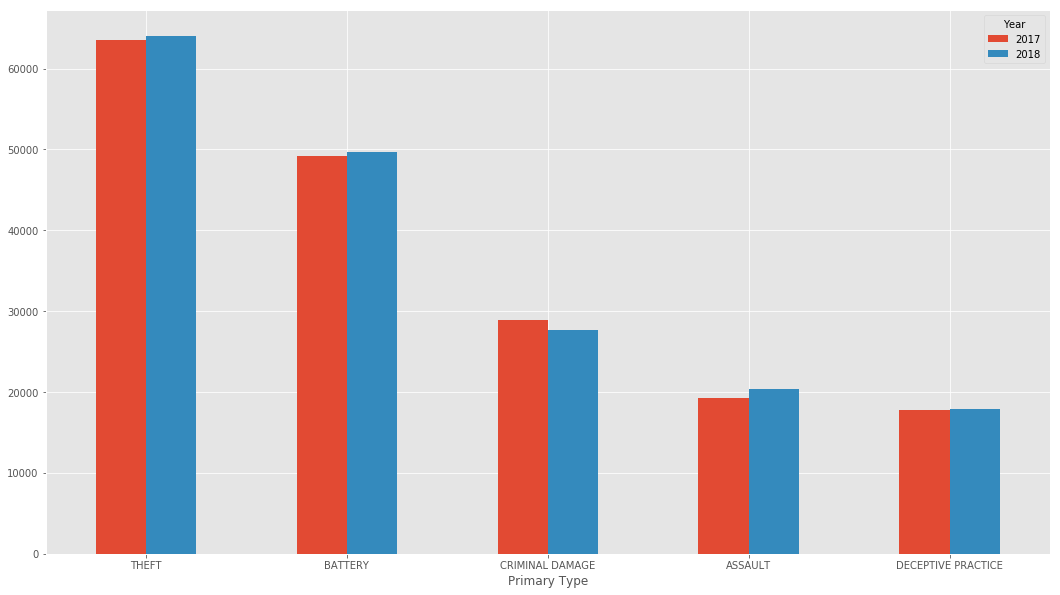

In [6]:
count_ax = type_count_df[:10].Count.unstack().plot.bar(stacked=False, figsize=(18,10), rot=0)
plt.show()

In [7]:
year_df = crime_df.groupby(["Year"]).size().to_frame("Count")
year_df

,Count
Year,
2017,264983
2018,263546


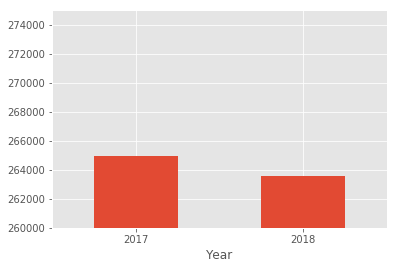

In [8]:
year_ax = year_df.plot(kind="bar", legend=False, rot=0)
year_ax.set_ylim(260000, 275000)
plt.show()

In [9]:
crime_df["Block"].value_counts().count()

30779

In [10]:
crime_df.groupby(["Longitude", "Latitude"]).size().to_frame("Count").sort_values(["Count"], ascending=False)

,,Count
Longitude,Latitude,
-87.627877,41.883500,1006
-87.624097,41.897895,584
-87.905227,41.976290,544
-87.639235,41.868542,502
-87.741529,41.754593,468
-87.709271,41.868181,460
-87.634088,41.742710,427
-87.627845,41.882394,416
-87.627760,41.881718,393


In [11]:
c = Census(my_api_key.MY_API_KEY, year=2017)

In [109]:
pov_list = c.acs5.state_county_blockgroup(("NAME", "GEO_ID", "B02001_001E", "B19013_001E"), '17', '031', Census.ALL)
# B02001_001E = race, B19013_001E = Median household income in the past 12 months
#pov_list = c.acs5.zipcode(("NAME", "B02001_001E", "B19013_001E"), Census.ALL)
pov_json = json.dumps(pov_list)
pov_df = pd.read_json(pov_json).dropna()
#pov_df.rename(columns={'zip code tabulation area':'zip'}, inplace=True)
pov_df.head()

,B02001_001E,B19013_001E,GEO_ID,NAME,block group,county,state,tract
0,600,21500,1500000US170312519001,"Block Group 1, Census Tract 2519, Cook County,...",1,31,17,251900
1,1546,32143,1500000US170312519002,"Block Group 2, Census Tract 2519, Cook County,...",2,31,17,251900
2,1341,57000,1500000US170318211011,"Block Group 1, Census Tract 8211.01, Cook Coun...",1,31,17,821101
3,1356,65699,1500000US170318211013,"Block Group 3, Census Tract 8211.01, Cook Coun...",3,31,17,821101
4,616,97656,1500000US170318211012,"Block Group 2, Census Tract 8211.01, Cook Coun...",2,31,17,821101


In [25]:
tracts = gpd.read_file("data/census_tract.geojson")
tracts.head(300)

,statefp10,name10,commarea_n,namelsad10,commarea,geoid10,notes,tractce10,countyfp10,geometry
0,17,8424,44,Census Tract 8424,44,17031842400,,842400,031,(POLYGON ((-87.62404799998049 41.7302169999839...
1,17,8403,59,Census Tract 8403,59,17031840300,,840300,031,(POLYGON ((-87.6860799999848 41.82295600001154...
2,17,8411,34,Census Tract 8411,34,17031841100,,841100,031,(POLYGON ((-87.62934700001182 41.8527970000265...
3,17,8412,31,Census Tract 8412,31,17031841200,,841200,031,(POLYGON ((-87.68813499997718 41.8556909999909...
4,17,8390,32,Census Tract 8390,32,17031839000,,839000,031,(POLYGON ((-87.63312200003458 41.8744880000269...
5,17,8382,28,Census Tract 8382,28,17031838200,,838200,031,(POLYGON ((-87.66781999997529 41.8741839999791...
6,17,6503.01,65,Census Tract 6503.01,65,17031650301,,650301,031,(POLYGON ((-87.73706400002477 41.7712039999837...
7,17,5305.03,53,Census Tract 5305.03,53,17031530503,,530503,031,(POLYGON ((-87.64386399998179 41.6632100000208...
8,17,7608.03,76,Census Tract 7608.03,76,17031760803,,760803,031,(POLYGON ((-87.83844200004106 41.9701999999708...
9,17,306.01,77,Census Tract 306.01,77,17031030601,,030601,031,(POLYGON ((-87.6543830000042 41.99020200000391...


In [87]:
zip_code = gpd.read_file("data/chicago_zipcode.geojson")
zip_code = zip_code[["zip", "geometry"]]
zip_code.zip = zip_code.zip.astype(int)
zip_code.head()

,zip,geometry
0,60647,(POLYGON ((-87.67762151065281 41.9177578010629...
1,60639,(POLYGON ((-87.72683253163021 41.9226462671259...
2,60707,(POLYGON ((-87.78500237831095 41.9091478547167...
3,60622,(POLYGON ((-87.6670686895295 41.88885188496992...
4,60651,(POLYGON ((-87.70655631674127 41.8955534069940...


In [98]:
chicago_block = gpd.read_file("data/chicago_block.geojson")
chicago_block = chicago_block[["geoid10", "tractce10", "geometry"]]
chicago_block.rename(columns={'geoid10':'geoid', 'tractce10':'tract'}, inplace=True)
chicago_block.head()

,geoid,tract,geometry
0,170316903002010,690300,(POLYGON ((-87.62906799941059 41.7690860000715...
1,170316809003007,680900,(POLYGON ((-87.6341179992764 41.77446599958471...
2,170316809003013,680900,(POLYGON ((-87.63485400018324 41.7726330002261...
3,170312909004019,290900,(POLYGON ((-87.73841099998789 41.8591310003707...
4,170312925004016,292500,(POLYGON ((-87.73217300001724 41.8547640004652...


In [92]:
crime_zip = pd.merge(zip_code, pov_df, on='zip', how='left')
crime_zip.head()

,zip,geometry,B02001_001E,B19013_001E
0,60647,(POLYGON ((-87.67762151065281 41.9177578010629...,87707.0,68223.0
1,60639,(POLYGON ((-87.72683253163021 41.9226462671259...,90767.0,41307.0
2,60707,(POLYGON ((-87.78500237831095 41.9091478547167...,43250.0,55566.0
3,60622,(POLYGON ((-87.6670686895295 41.88885188496992...,53680.0,87143.0
4,60651,(POLYGON ((-87.70655631674127 41.8955534069940...,61828.0,36283.0


In [14]:
crime_df["Coordinates"] = list(zip(crime_df.Longitude, crime_df.Latitude))

In [15]:
crime_df["Coordinates"] = crime_df["Coordinates"].apply(Point)

In [16]:
crime_gdf = gpd.GeoDataFrame(crime_df, geometry='Coordinates')

In [43]:
crime_gdf.head(20)
#crime_gdf.count()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Coordinates
0,11094370,JA440032,09/21/2017 12:15:00 AM,072XX N CALIFORNIA AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,...,2.0,10,1156443.0,1947707.0,2017,03/01/2018 03:52:35 PM,42.012293,-87.699714,"(42.012293397, -87.699714109)",POINT (-87.699714109 42.012293397)
1,11118031,JA470589,10/12/2017 07:14:00 PM,055XX W GRAND AVE,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,JAIL / LOCK-UP FACILITY,True,False,...,19.0,14,1138788.0,1913480.0,2017,03/01/2018 03:52:35 PM,41.918712,-87.765511,"(41.918711651, -87.76551063)",POINT (-87.76551062999999 41.918711651)
2,11134189,JA491697,10/30/2017 11:52:00 AM,043XX S TALMAN AVE,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,APARTMENT,True,False,...,58.0,26,1159425.0,1875711.0,2017,03/01/2018 03:52:35 PM,41.814670,-87.690727,"(41.814669784, -87.690726696)",POINT (-87.690726696 41.814669784)
3,11156462,JA521389,09/29/2017 06:45:00 PM,055XX W BELMONT AVE,1110,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,...,19.0,11,1138653.0,1920720.0,2017,03/01/2018 03:52:35 PM,41.938581,-87.765831,"(41.938581442, -87.765830579)",POINT (-87.765830579 41.938581442)
4,11164874,JA531910,12/01/2017 06:20:00 AM,022XX W CHICAGO AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,STREET,True,False,...,24.0,02,1161264.0,1905292.0,2017,03/01/2018 03:52:35 PM,41.895805,-87.683159,"(41.895805099, -87.683159355)",POINT (-87.683159355 41.895805099)
5,10974196,JA298243,06/08/2017 04:02:00 PM,001XX E 59TH ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,True,False,...,40.0,15,1178308.0,1865932.0,2017,02/11/2018 03:54:58 PM,41.787427,-87.621759,"(41.78742694, -87.621758727)",POINT (-87.62175872700001 41.78742694)
6,10995008,JA322389,06/25/2017 07:00:00 PM,003XX W 103RD ST,031A,ROBBERY,ARMED: HANDGUN,SMALL RETAIL STORE,True,False,...,49.0,03,1175895.0,1836626.0,2017,02/11/2018 03:54:58 PM,41.707062,-87.631483,"(41.707062135, -87.631482564)",POINT (-87.631482564 41.707062135)
7,11086755,JA430240,09/06/2017 01:30:00 PM,032XX W 26TH ST,0810,THEFT,OVER $500,OTHER,True,False,...,30.0,06,1155313.0,1886555.0,2017,02/11/2018 03:54:58 PM,41.844510,-87.705519,"(41.844510467, -87.705519454)",POINT (-87.705519454 41.844510467)
8,11162428,JA529032,11/28/2017 09:43:00 PM,026XX S CALIFORNIA BLVD,5131,OTHER OFFENSE,VIOLENT OFFENDER: ANNUAL REGISTRATION,JAIL / LOCK-UP FACILITY,True,False,...,30.0,26,1158280.0,1886310.0,2017,02/11/2018 03:54:58 PM,41.843778,-87.694638,"(41.843778126, -87.694637678)",POINT (-87.69463767799999 41.843778126)
9,11175304,JA545986,12/11/2017 07:15:00 PM,007XX N SACRAMENTO BLVD,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,True,False,...,23.0,03,1156092.0,1904769.0,2017,02/11/2018 03:54:58 PM,41.894476,-87.702169,"(41.894475919, -87.702169158)",POINT (-87.70216915799999 41.894475919)


In [62]:
test = gpd.sjoin(crime_gdf, zip_code, how="inner", op='within')
#test.zip = test.zip.astype(int)
test.count()

ID                      527076
Case Number             527076
Date                    527076
Block                   527076
IUCR                    527076
Primary Type            527076
Description             527076
Location Description    525638
Arrest                  527076
Domestic                527076
Beat                    527076
District                527075
Ward                    527075
Community Area          527074
FBI Code                527076
X Coordinate            527076
Y Coordinate            527076
Year                    527076
Updated On              527076
Latitude                527076
Longitude               527076
Location                527076
Coordinates             527076
index_right             527076
objectid                527076
shape_area              527076
shape_len               527076
zip                     527076
dtype: int64

In [66]:
test.zip = test.zip.astype(int)
test.zip.unique()

array([60645, 60639, 60632, 60641, 60612, 60637, 60628, 60623, 60608,
       60620, 60643, 60644, 60624, 60622, 60651, 60621, 60619, 60618,
       60647, 60649, 60614, 60602, 60625, 60611, 60617, 60652, 60653,
       60607, 60609, 60629, 60636, 60615, 60646, 60634, 60630, 60659,
       60654, 60640, 60655, 60661, 60606, 60601, 60657, 60633, 60610,
       60642, 60827, 60605, 60604, 60603, 60626, 60613, 60616, 60638,
       60660, 60707, 60631, 60666, 60656])

In [64]:
test.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Coordinates,index_right,objectid,shape_area,shape_len,zip
0,11094370,JA440032,09/21/2017 12:15:00 AM,072XX N CALIFORNIA AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,...,03/01/2018 03:52:35 PM,42.012293,-87.699714,"(42.012293397, -87.699714109)",POINT (-87.699714109 42.012293397),11,2,62181473.5197,32075.5994211,60645
270,10811784,JA110981,01/10/2017 05:58:00 PM,023XX W JARVIS AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,02/10/2018 03:50:01 PM,42.015655,-87.689425,"(42.015655391, -87.689424909)",POINT (-87.689424909 42.015655391),11,2,62181473.5197,32075.5994211,60645
426,10812245,JA111592,01/10/2017 10:00:00 PM,065XX N SEELEY AVE,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,02/10/2018 03:50:01 PM,42.000290,-87.681438,"(42.000289522, -87.681438236)",POINT (-87.68143823600001 42.000289522),11,2,62181473.5197,32075.5994211,60645
593,10812783,JA111993,01/10/2017 01:30:00 AM,075XX N WESTERN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,...,02/10/2018 03:50:01 PM,42.018245,-87.690186,"(42.018244679, -87.690186314)",POINT (-87.690186314 42.018244679),11,2,62181473.5197,32075.5994211,60645
689,10812933,JA112089,01/08/2017 05:00:00 AM,065XX N CLAREMONT AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,02/10/2018 03:50:01 PM,41.999699,-87.688718,"(41.999699467, -87.688717564)",POINT (-87.688717564 41.999699467),11,2,62181473.5197,32075.5994211,60645


In [67]:
test2 = pd.merge(test, pov_df, on='zip', how='left')

In [68]:
test2.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Coordinates,index_right,objectid,shape_area,shape_len,zip,B02001_001E,B19013_001E
0,11094370,JA440032,09/21/2017 12:15:00 AM,072XX N CALIFORNIA AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,...,-87.699714,"(42.012293397, -87.699714109)",POINT (-87.699714109 42.012293397),11,2,62181473.5197,32075.5994211,60645,48269.0,50589.0
1,10811784,JA110981,01/10/2017 05:58:00 PM,023XX W JARVIS AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,-87.689425,"(42.015655391, -87.689424909)",POINT (-87.689424909 42.015655391),11,2,62181473.5197,32075.5994211,60645,48269.0,50589.0
2,10812245,JA111592,01/10/2017 10:00:00 PM,065XX N SEELEY AVE,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,False,...,-87.681438,"(42.000289522, -87.681438236)",POINT (-87.68143823600001 42.000289522),11,2,62181473.5197,32075.5994211,60645,48269.0,50589.0
3,10812783,JA111993,01/10/2017 01:30:00 AM,075XX N WESTERN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,...,-87.690186,"(42.018244679, -87.690186314)",POINT (-87.690186314 42.018244679),11,2,62181473.5197,32075.5994211,60645,48269.0,50589.0
4,10812933,JA112089,01/08/2017 05:00:00 AM,065XX N CLAREMONT AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,-87.688718,"(41.999699467, -87.688717564)",POINT (-87.688717564 41.999699467),11,2,62181473.5197,32075.5994211,60645,48269.0,50589.0


In [70]:
test2.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Coordinates', 'index_right', 'objectid', 'shape_area',
       'shape_len', 'zip', 'B02001_001E', 'B19013_001E'],
      dtype='object')

In [71]:
test2[["Primary Type", "Year", "zip", 'B02001_001E', 'B19013_001E']]

,Primary Type,Year,zip,B02001_001E,B19013_001E
0,DECEPTIVE PRACTICE,2017,60645,48269.0,50589.0
1,BATTERY,2017,60645,48269.0,50589.0
2,THEFT,2017,60645,48269.0,50589.0
3,CRIMINAL DAMAGE,2017,60645,48269.0,50589.0
4,CRIM SEXUAL ASSAULT,2017,60645,48269.0,50589.0
5,DECEPTIVE PRACTICE,2017,60645,48269.0,50589.0
6,THEFT,2017,60645,48269.0,50589.0
7,BATTERY,2017,60645,48269.0,50589.0
8,DECEPTIVE PRACTICE,2017,60645,48269.0,50589.0
9,THEFT,2017,60645,48269.0,50589.0


In [85]:
test3 = test2[['zip', 'B19013_001E']]
test3.head()

,zip,B19013_001E
0,60645,50589.0
1,60645,50589.0
2,60645,50589.0
3,60645,50589.0
4,60645,50589.0


In [89]:
crime_zip.head()

,zip,geometry,B02001_001E,B19013_001E
0,60647,(POLYGON ((-87.67762151065281 41.9177578010629...,87707.0,68223.0
1,60639,(POLYGON ((-87.72683253163021 41.9226462671259...,90767.0,41307.0
2,60707,(POLYGON ((-87.78500237831095 41.9091478547167...,43250.0,55566.0
3,60622,(POLYGON ((-87.6670686895295 41.88885188496992...,53680.0,87143.0
4,60651,(POLYGON ((-87.70655631674127 41.8955534069940...,61828.0,36283.0


In [111]:
crime_zip_test = crime_zip[["geometry", "B19013_001E"]]
crime_zip_test.head()

,geometry,B19013_001E
0,(POLYGON ((-87.67762151065281 41.9177578010629...,68223.0
1,(POLYGON ((-87.72683253163021 41.9226462671259...,41307.0
2,(POLYGON ((-87.78500237831095 41.9091478547167...,55566.0
3,(POLYGON ((-87.6670686895295 41.88885188496992...,87143.0
4,(POLYGON ((-87.70655631674127 41.8955534069940...,36283.0


Text(0.5, 1.0, 'Alameda County, CA - Median Household Income by Census Tract')

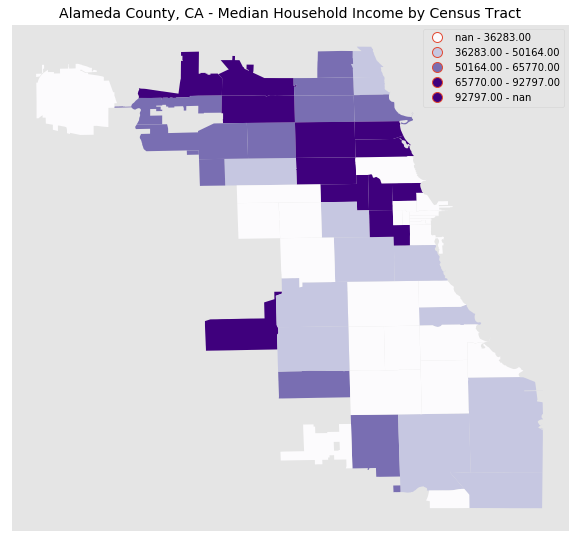

In [117]:
crime_zip_test = crime_zip[["geometry", "B19013_001E"]]
fig, ax = plt.subplots(figsize=(10,10))
ax.set(aspect='equal', xticks=[], yticks=[])
crime_zip.plot(column= 'B19013_001E', ax = ax, scheme='QUANTILES', cmap='Purples', legend=True)
plt.title('Alameda County, CA - Median Household Income by Census Tract', size = 14)